<a href="https://colab.research.google.com/github/kashishrastogi1/kashishrastogi_cseai_assignment1/blob/main/ML_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

carprice.csv using multiple linear regression as carprice is dependent on all other variables

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("CarPrice_Assignment.csv")
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [3]:
df['fueltype']=df['fueltype'].astype('category')
df['fueltype']=df['fueltype'].cat.codes
df['aspiration']=df['aspiration'].astype('category')
df['aspiration']=df['aspiration'].cat.codes
df['doornumber']=df['doornumber'].astype('category')
df['doornumber']=df['doornumber'].cat.codes
df['carbody']=df['carbody'].astype('category')
df['carbody']=df['carbody'].cat.codes
df['drivewheel']=df['drivewheel'].astype('category')
df['drivewheel']=df['drivewheel'].cat.codes
df['enginetype']=df['enginetype'].astype('category')
df['enginetype']=df['enginetype'].cat.codes
df['fuelsystem']=df['fuelsystem'].astype('category')
df['fuelsystem']=df['fuelsystem'].cat.codes
df['CarName']=df['CarName'].astype('category')
df['CarName']=df['CarName'].cat.codes
df['cylindernumber']=df['cylindernumber'].astype('category')
df['cylindernumber']=df['cylindernumber'].cat.codes
df['enginelocation']=df['enginelocation'].astype('category')
df['enginelocation']=df['enginelocation'].cat.codes
df


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,2,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,3,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,1,1,0,1,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,4,1,0,0,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,5,1,0,0,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,139,1,0,0,3,2,0,109.1,...,141,5,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,138,1,1,0,3,2,0,109.1,...,141,5,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,140,1,0,0,3,2,0,109.1,...,173,5,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,142,0,1,0,3,2,0,109.1,...,145,3,3.01,3.40,23.0,106,4800,26,27,22470.0


It is important for us to convert string type data into int form to make it easily readable of model

In [4]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

Hence this csv file has no null values

In [5]:
X=df.drop(columns='price')
X

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,1,3,2,1,0,1,0,2,0,88.6,...,2,130,5,3.47,2.68,9.0,111,5000,21,27
1,2,3,3,1,0,1,0,2,0,88.6,...,2,130,5,3.47,2.68,9.0,111,5000,21,27
2,3,1,1,1,0,1,2,2,0,94.5,...,3,152,5,2.68,3.47,9.0,154,5000,19,26
3,4,2,4,1,0,0,3,1,0,99.8,...,2,109,5,3.19,3.40,10.0,102,5500,24,30
4,5,2,5,1,0,0,3,0,0,99.4,...,1,136,5,3.19,3.40,8.0,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,139,1,0,0,3,2,0,109.1,...,2,141,5,3.78,3.15,9.5,114,5400,23,28
201,202,-1,138,1,1,0,3,2,0,109.1,...,2,141,5,3.78,3.15,8.7,160,5300,19,25
202,203,-1,140,1,0,0,3,2,0,109.1,...,3,173,5,3.58,2.87,8.8,134,5500,18,23
203,204,-1,142,0,1,0,3,2,0,109.1,...,3,145,3,3.01,3.40,23.0,106,4800,26,27


In [65]:
y=df['price']
y   #value to predict

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=23)

In [9]:
X_train

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
55,56,3,53,1,0,1,2,2,0,95.3,...,6,70,2,3.33,3.255,9.4,101,6000,17,23
112,113,0,88,0,1,0,3,2,0,107.9,...,2,152,3,3.70,3.520,21.0,95,4150,28,33
190,191,3,146,1,0,1,2,1,0,94.5,...,2,109,5,3.19,3.400,8.5,90,5500,24,29
3,4,2,4,1,0,0,3,1,0,99.8,...,2,109,5,3.19,3.400,10.0,102,5500,24,30
140,141,2,107,1,0,1,2,0,0,93.3,...,2,108,1,3.62,2.640,8.7,73,4400,26,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31,32,2,43,1,0,1,2,1,0,86.6,...,2,92,0,2.91,3.410,9.2,76,6000,31,38
182,183,2,129,0,0,1,3,1,0,97.3,...,2,97,3,3.01,3.400,23.0,52,4800,37,46
201,202,-1,138,1,1,0,3,2,0,109.1,...,2,141,5,3.78,3.150,8.7,160,5300,19,25
40,41,0,36,1,0,0,3,1,0,96.5,...,2,110,0,3.15,3.580,9.0,86,5800,27,33


In [ ]:
143 rows i.e 0.7% of total used for training our model

In [10]:
X_test

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
74,75,1,21,1,0,1,1,2,0,112.0,...,0,304,5,3.80,3.35,8.0,184,4500,14,16
51,52,1,51,1,0,1,2,1,0,93.1,...,2,91,1,3.03,3.15,9.0,68,5000,31,38
46,47,2,45,1,0,1,2,2,0,96.0,...,2,119,7,3.43,3.23,9.2,90,5000,24,29
14,15,1,15,1,0,0,3,2,0,103.5,...,3,164,5,3.31,3.19,9.0,121,4250,20,25
18,19,2,24,1,0,1,2,1,0,88.4,...,4,61,1,2.91,3.03,9.5,48,5100,47,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,76,1,62,1,1,1,2,2,0,102.7,...,2,140,5,3.78,3.12,8.0,175,5000,19,24
108,109,0,84,0,1,0,3,2,0,107.9,...,2,152,3,3.70,3.52,21.0,95,4150,28,33
76,77,2,65,1,0,1,2,1,0,93.7,...,2,92,1,2.97,3.23,9.4,68,5500,37,41
145,146,0,109,1,1,0,3,0,0,97.0,...,2,108,5,3.62,2.64,7.7,111,4800,24,29


62 rows means approx 0.3% total rows i.e 205 is used to test

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler=StandardScaler() #done to standardize data since some values are too large in comparision

In [13]:
X_train_scaled=scaler.fit_transform(X_train)


In [14]:
X_test_scaled=scaler.transform(X_test)

In [15]:
X_train_scaled

array([[-0.76182803,  1.83823064, -0.5689763 , ...,  1.82207199,
        -1.30765674, -1.19615368],
       [ 0.19189034, -0.62614731,  0.28007748, ..., -2.12898657,
         0.46710085,  0.34901322],
       [ 1.49697863,  1.83823064,  1.68708089, ...,  0.75421832,
        -0.17826554, -0.26905354],
       ...,
       [ 1.68102954, -1.44760663,  1.49301146, ...,  0.32707686,
        -0.98497354, -0.8871203 ],
       [-1.01280655, -0.62614731, -0.98137385, ...,  1.39493052,
         0.30575925,  0.34901322],
       [-0.2933348 ,  1.83823064, -0.32638951, ..., -0.31363534,
        -0.98497354, -1.04163699]])

In [16]:
y_train=np.array(y_train).reshape(-1,1)

In [17]:
y_test=np.array(y_test).reshape(-1,1)

In [18]:
y_train_scaled=scaler.fit_transform(y_train)

In [19]:
y_test_scaled=scaler.transform(y_test)

In [20]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()


In [21]:
lr.fit(X_train_scaled,y_train) #training data is fit in model

LinearRegression()

In [22]:
c=lr.intercept_


In [23]:
c

array([12810.01515385])

In [24]:
m=lr.coef_
m

array([[  463.306772  ,   -31.12178519, -1862.24018252, -1189.8489083 ,
          137.43087989,    90.75435838,    21.42961213,   565.86676022,
          996.32361826,   740.45375196,   -40.58435264,   732.25049114,
          417.49945754,  1266.90306531,  -187.57257536,   116.69127797,
         2317.65711041,  -139.03737927,    17.98474635,  -856.18281011,
         -125.91672034,  1654.55531045,   638.75913301, -1571.06834149,
         1529.25396914]])

In [25]:
y_pred_train=lr.predict(X_train_scaled)
y_pred_train

array([[10140.69126679],
       [19917.49630503],
       [ 5383.63244626],
       [13136.59295233],
       [ 6378.19861445],
       [21488.69975538],
       [26085.22855394],
       [ 9750.34705148],
       [ 6590.52583083],
       [10958.13017152],
       [ 9542.0116243 ],
       [ 8526.66824652],
       [13187.94154856],
       [ 6406.44173316],
       [16745.05720934],
       [ 3857.33367683],
       [34028.        ],
       [ 6349.80287781],
       [15991.95426305],
       [15789.3349204 ],
       [10838.10771462],
       [ 9773.2657859 ],
       [14329.13411763],
       [ 9356.01124449],
       [ 9879.43372488],
       [20138.53346815],
       [18487.6770801 ],
       [ 4937.37263019],
       [20025.07154519],
       [17442.35853892],
       [ 7267.26971539],
       [ 8233.1230801 ],
       [12889.05714611],
       [18417.83061863],
       [27361.41834324],
       [11498.41436423],
       [19466.40504274],
       [15349.86144191],
       [ 5261.30454749],
       [ 4918.83491259],


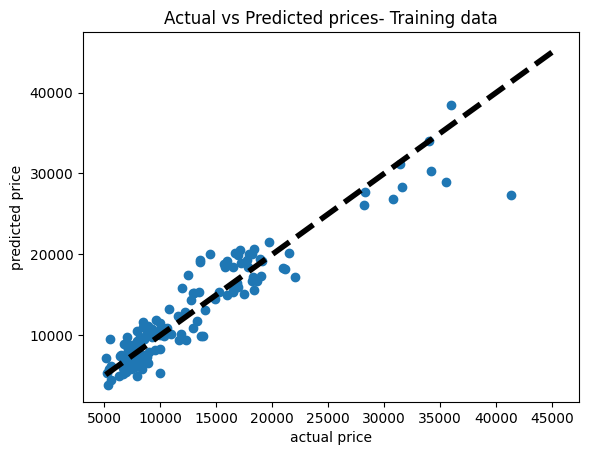

In [63]:
plt.scatter(y_train,y_pred_train,alpha=1)
plt.plot([y.min(), y.max()], [y.min(), y.max()],'k--',lw=4)
plt.xlabel("actual price")
plt.ylabel("predicted price")
plt.title("Actual vs Predicted prices- Training data")
plt.show()

In [27]:
from sklearn.metrics import r2_score

In [28]:
r2_score(y_train,y_pred_train)  #the training score is about 88%

0.8825243778874442

In [29]:
y_pred_test=lr.predict(X_test_scaled)

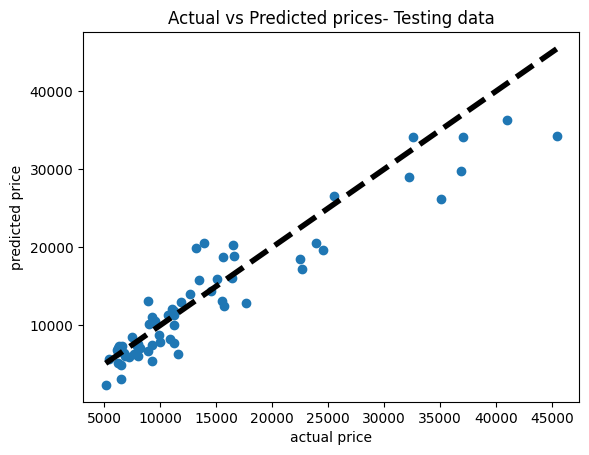

In [64]:
plt.scatter(y_test,y_pred_test)
plt.plot([y.min(), y.max()], [y.min(), y.max()],'k--',lw=4)
plt.xlabel("actual price")
plt.ylabel("predicted price")
plt.title("Actual vs Predicted prices- Testing data")
plt.show()

In [31]:
r2_score(y_test,y_pred_test)

0.8787446080021171

Hence 87% of data is correctly predicted by our model which is descent

food.csv using logistic regression

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
df2=pd.read_csv("fastfood.csv")
df2

,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,Healthy
0,Mcdonalds,Artisan Grilled Chicken Sandwich,380,60,7,2.0,0.0,95,1110,44,3.0,11,37.0,4.0,20.0,20.0,1
1,Mcdonalds,Single Bacon Smokehouse Burger,840,410,45,17.0,1.5,130,1580,62,2.0,18,46.0,6.0,20.0,20.0,0
2,Mcdonalds,Double Bacon Smokehouse Burger,1130,600,67,27.0,3.0,220,1920,63,3.0,18,70.0,10.0,20.0,50.0,0
3,Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich,750,280,31,10.0,0.5,155,1940,62,2.0,18,55.0,6.0,25.0,20.0,1
4,Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich,920,410,45,12.0,0.5,120,1980,81,4.0,18,46.0,6.0,20.0,20.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510,Taco Bell,Spicy Triple Double Crunchwrap,780,340,38,10.0,0.5,50,1850,87,9.0,8,23.0,20.0,10.0,25.0,0
511,Taco Bell,Express Taco Salad w/ Chips,580,260,29,9.0,1.0,60,1270,59,8.0,7,23.0,NaN,NaN,NaN,0
512,Taco Bell,Fiesta Taco Salad-Beef,780,380,42,10.0,1.0,60,1340,74,11.0,7,26.0,NaN,NaN,NaN,0
513,Taco Bell,Fiesta Taco Salad-Chicken,720,320,35,7.0,0.0,70,1260,70,8.0,8,32.0,NaN,NaN,NaN,0


In [34]:
df2['restaurant']=df2['restaurant'].astype('category')
df2['restaurant']=df2['restaurant'].cat.codes

df2['item']=df2['item'].astype('category')
df2['item']=df2['item'].cat.codes

df2  #conversion from str to int

,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,Healthy
0,4,91,380,60,7,2.0,0.0,95,1110,44,3.0,11,37.0,4.0,20.0,20.0,1
1,4,420,840,410,45,17.0,1.5,130,1580,62,2.0,18,46.0,6.0,20.0,20.0,0
2,4,242,1130,600,67,27.0,3.0,220,1920,63,3.0,18,70.0,10.0,20.0,50.0,0
3,4,313,750,280,31,10.0,0.5,155,1940,62,2.0,18,55.0,6.0,25.0,20.0,1
4,4,211,920,410,45,12.0,0.5,120,1980,81,4.0,18,46.0,6.0,20.0,20.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510,7,455,780,340,38,10.0,0.5,50,1850,87,9.0,8,23.0,20.0,10.0,25.0,0
511,7,253,580,260,29,9.0,1.0,60,1270,59,8.0,7,23.0,NaN,NaN,NaN,0
512,7,259,780,380,42,10.0,1.0,60,1340,74,11.0,7,26.0,NaN,NaN,NaN,0
513,7,260,720,320,35,7.0,0.0,70,1260,70,8.0,8,32.0,NaN,NaN,NaN,0


In [35]:
df2.isnull().sum() #dataset has null values

restaurant       0
item             0
calories         0
cal_fat          0
total_fat        0
sat_fat          0
trans_fat        0
cholesterol      0
sodium           0
total_carb       0
fiber           12
sugar            0
protein          1
vit_a          214
vit_c          210
calcium        210
Healthy          0
dtype: int64

In [36]:
df2['fiber'].value_counts()

2.0     102
3.0      82
4.0      71
1.0      65
5.0      64
10.0     30
7.0      23
8.0      15
6.0      14
0.0      12
9.0       9
12.0      5
16.0      3
13.0      2
14.0      2
11.0      2
15.0      1
17.0      1
Name: fiber, dtype: int64

In [37]:
df2['vit_a'].value_counts()

10.0     43
0.0      35
15.0     30
20.0     26
8.0      24
6.0      23
2.0      20
4.0      16
16.0     15
25.0     14
50.0     13
30.0     10
180.0     9
1.0       6
60.0      6
35.0      3
40.0      3
11.0      2
17.0      1
7.0       1
45.0      1
Name: vit_a, dtype: int64

In [38]:
df2['vit_c'].value_counts()

20.0     36
2.0      34
8.0      30
0.0      29
40.0     28
4.0      26
6.0      23
10.0     19
15.0     14
50.0     14
60.0     11
45.0      9
30.0      8
25.0      7
70.0      5
35.0      3
7.0       2
3.0       2
1.0       1
16.0      1
90.0      1
200.0     1
400.0     1
Name: vit_c, dtype: int64

In [39]:
df2['calcium'].value_counts()

30.0     37
15.0     35
20.0     30
10.0     24
6.0      22
35.0     20
4.0      19
2.0      18
60.0     18
25.0     16
8.0      14
40.0     12
45.0      7
0.0       5
80.0      5
70.0      5
50.0      3
100.0     3
16.0      2
13.0      2
1.0       2
90.0      2
27.0      1
3.0       1
14.0      1
290.0     1
Name: calcium, dtype: int64

In [40]:
df2['fiber']=df2['fiber'].fillna(value=2.0)
df2['vit_a']=df2['vit_a'].fillna(value=10.0)
df2['vit_c']=df2['vit_c'].fillna(value=20.0)
df2['calcium']=df2['calcium'].fillna(value=30.0)  #value filled according to their occurance in our dataset

In [41]:
df2.dropna(inplace=True)

In [42]:
df2.isnull().sum() #now no null values

restaurant     0
item           0
calories       0
cal_fat        0
total_fat      0
sat_fat        0
trans_fat      0
cholesterol    0
sodium         0
total_carb     0
fiber          0
sugar          0
protein        0
vit_a          0
vit_c          0
calcium        0
Healthy        0
dtype: int64

In [43]:
X1=df2.drop(columns='Healthy')
X1

,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium
0,4,91,380,60,7,2.0,0.0,95,1110,44,3.0,11,37.0,4.0,20.0,20.0
1,4,420,840,410,45,17.0,1.5,130,1580,62,2.0,18,46.0,6.0,20.0,20.0
2,4,242,1130,600,67,27.0,3.0,220,1920,63,3.0,18,70.0,10.0,20.0,50.0
3,4,313,750,280,31,10.0,0.5,155,1940,62,2.0,18,55.0,6.0,25.0,20.0
4,4,211,920,410,45,12.0,0.5,120,1980,81,4.0,18,46.0,6.0,20.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510,7,455,780,340,38,10.0,0.5,50,1850,87,9.0,8,23.0,20.0,10.0,25.0
511,7,253,580,260,29,9.0,1.0,60,1270,59,8.0,7,23.0,10.0,20.0,30.0
512,7,259,780,380,42,10.0,1.0,60,1340,74,11.0,7,26.0,10.0,20.0,30.0
513,7,260,720,320,35,7.0,0.0,70,1260,70,8.0,8,32.0,10.0,20.0,30.0


In [44]:
y1=df2['Healthy']
y1   #value to predict

0      1
1      0
2      0
3      1
4      0
      ..
510    0
511    0
512    0
513    0
514    0
Name: Healthy, Length: 514, dtype: int64

In [45]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test=train_test_split(X1, y1, test_size=0.3, random_state=21)

In [46]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X1_train_scaled=scaler.fit_transform(X1_train)
X1_test_scaled=scaler.transform(X1_test)

In [47]:
X1_train_scaled

array([[ 1.16620647e+00,  8.32277045e-01,  8.54792921e-01, ...,
        -2.03913538e-01, -1.12183469e-02,  1.29809903e-01],
       [-4.59689153e-01,  1.43427115e+00,  1.41423141e+00, ...,
        -2.03913538e-01, -1.12183469e-02,  1.29809903e-01],
       [-5.32152468e-02,  9.69093886e-01, -3.01276066e-03, ...,
        -3.71334831e-01, -3.91160474e-01, -3.41867782e-01],
       ...,
       [ 7.59732566e-01, -1.06947705e+00, -1.42025693e+00, ...,
         1.47029939e+00,  1.12860804e+00, -1.00221654e+00],
       [-5.32152468e-02,  9.34889676e-01, -1.45755283e+00, ...,
         6.91149141e+00,  9.38636972e-01, -8.13545468e-01],
       [-1.27263697e+00,  6.13370099e-01,  1.71259860e+00, ...,
        -2.03913538e-01, -1.12183469e-02,  1.29809903e-01]])

In [48]:

from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression(random_state=0).fit(X1_train_scaled, y1_train)

In [49]:
log_reg.predict(X1_train_scaled)

array([ 0,  0,  1,  1,  0,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0,  0,  0,
        1,  1,  1,  0,  1,  0,  1,  1,  0,  1,  0,  1,  1,  1,  0,  0,  1,
        1,  0,  0,  0,  1,  0,  0,  1,  1,  0,  1,  0,  0,  1,  1,  1,  1,
        1,  1,  1,  1,  0,  1,  1,  1,  1,  0,  1,  1,  1,  0,  0,  1,  0,
        0,  0,  1,  0,  0,  0,  1,  0,  1,  0,  0,  1,  1,  1,  0,  0,  0,
        0,  1,  0,  1,  0,  1,  0,  0,  1,  0,  1,  1,  1,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1,  1,  0,  1,  0,  1,  0,  0,  0,  0,  0,  0,
        1,  1,  1,  0,  0,  1,  1,  1,  0,  0,  0,  1,  0,  0,  0,  0,  1,
        0,  1,  1,  1,  1,  0,  0,  1,  1,  0,  1,  1,  0,  0,  1,  1,  0,
        1,  0,  1,  0,  1,  0,  0,  0,  1,  0,  1,  0,  1,  0,  0,  0,  0,
        1,  1,  0,  0,  0,  1,  0,  0,  0,  0,  1,  1,  1,  0,  0,  1,  0,
        1,  0,  0,  1,  1,  1,  0,  1,  1,  1,  0,  1,  1,  1,  1,  1,  1,
        1,  0,  1,  0,  0,  0,  0,  1,  0,  0,  1,  0,  0,  0,  0,  0,  0,
        0, 80,  0,  1,  1

In [50]:
log_reg.score(X1_train_scaled, y1_train) #95% training data is accurate

0.9554317548746518

In [51]:
log_reg.predict(X1_test_scaled)

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0])

In [52]:
log_reg.score(X1_test_scaled, y1_test) #95% data tested is accurate

0.9548387096774194

improving model using more parameters

In [53]:
log_reg1=LogisticRegression(random_state=0, C=1, fit_intercept=True).fit(X1_train_scaled, y1_train)

In [54]:
log_reg1.score(X1_train_scaled, y1_train)

0.9554317548746518

In [55]:
log_reg1.score(X1_test_scaled, y1_test) #no such difference

0.9548387096774194